# O problema 


 A equipe de assinaturas tem como objetivo reduzir a perda de assinantes. O conceito de “Churn” refere-se a perda de qualquer usuário que assinou o serviço de uma assinatura da empresa e o cancelou em algum momento após a contratação.  Ao analisar os dados dos últimos meses, apesar de todas as melhorias de usabilidade da plataforma, o churn vem aumentando. 

In [1]:
#Import das bibliotecas

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 


sns.set()

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Estaciando o dataframe
df =  pd.read_csv('https://raw.githubusercontent.com/petlove/vagas/master/data/bi-analysis/data-test-analytics.csv')

In [3]:
# Primeiras linhas do dataframe
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10 00:00:00.000000,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06 00:00:00.000000,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18 00:00:00.000000,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21 00:00:00.000000,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:50.661827,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07 00:00:00.000000,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:50.662621,252.940997,9,2023.527980,8,31,crm


# Visão geral do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

In [5]:
#Analisando dados estatísticos das features numéricas
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


In [6]:
df.index
#começa com o indice 0, vai até o 10000, de 1 em 1

RangeIndex(start=0, stop=10000, step=1)

In [7]:
# Lista das colunas
list(df.columns)
df

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10 00:00:00.000000,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06 00:00:00.000000,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18 00:00:00.000000,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21 00:00:00.000000,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:50.661827,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07 00:00:00.000000,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:50.662621,252.940997,9,2023.527980,8,31,crm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,90c9fd5f-80d2-4f59-9970-6b3e6dac5f57,2017-09-12 00:35:59.000000,2021-01-31 11:23:53.286451,NaN,eb89d44181a7873ba67f24ff511fc57f,befbd1b02e0a4d52a913adbd093789ab,be93ff9948bf23bd373599f3d5d3798c,1961-09-12 00:00:00.000000,active,4.30.12,Souza,RN,Concórdia,2021-01-31 11:23:53.286451,215.079785,5,1075.398927,5,18,paid_search
9996,0edb7aec-8816-4904-bcd7-cbe141391441,2018-04-20 07:43:38.000000,2021-01-18 11:23:53.286720,NaN,8d5dc7dd1225fa9746f4509c8cadeedb,d1beba53e18c097d0bb2a4a91de9ad09,1aafbc7d76201a320a5f97dafd891e95,1969-09-15 00:00:00.000000,active,4.28.13,Silveira,AL,São Francisco,2021-01-18 11:23:53.286720,254.525826,10,2290.732434,9,31,organic_search
9997,30130652-d616-4b40-adbb-189e3351016c,2017-08-14 00:28:45.000000,2021-01-03 11:23:53.286992,NaN,9517c44d34d9965d25e77487a510b696,baffbfb45790c0bca921d418b2ccc987,0cad001abedb688cc64a819d04a3bc71,1960-01-14 00:00:00.000000,active,3.18.11,Martins,SC,Frei Leopoldo,2021-01-03 11:23:53.286992,208.741902,8,1252.451411,6,46,paid_search
9998,37b52952-afdd-425a-9149-4012ea48ac87,2017-01-19 19:19:03.000000,2021-01-09 11:23:53.287244,NaN,c800df6e2b9449cb5d6a812563566887,0373a1cdff0fca0b4c4111401051548c,ffd915817fc2bd67575436b7f8e57bde,1957-08-06 00:00:00.000000,active,5.51.6,Gomes das Flores,PA,Cdi Jatoba,2021-01-09 11:23:53.287244,211.174796,9,0.000000,0,40,direct


In [8]:
round(df.describe(), 2)
# Aqui temos as informações estatísticas, e que serão muito úteis no decorrer do processo.
# Também vemos que as unicas colunas nessa amostra são as do tipo float e int
# o comando .road(2) no final: reduz o número de casas decimais para 2.Para ter uma melhor visualização

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,216.89,8.50,1174.89,5.42,67.19
std,22.76,3.03,763.14,3.46,175.72
min,131.38,1.00,0.00,0.00,1.00
25%,201.40,6.00,494.87,2.00,31.00
50%,217.02,8.00,1172.75,5.00,35.00
75%,232.46,11.00,1798.48,8.00,39.00
max,303.39,19.00,3225.65,11.00,1820.00


# EDA 

In [9]:
def EDA (df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = sorted(df.columns.str.lower().tolist(), reverse=False)
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

In [10]:
EDA(df)

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
address_hash,0,0.00,object,10000,NaN,NaN,fff863bb528f025da97bec9b1438f61c,0003ae4b2b7e769eae461d39e442f109,NaN,10000
all_orders,0,0.00,int64,10000,5.42,5.00,11,0,3.46,12
all_revenue,0,0.00,float64,10000,1174.89,1172.75,3225.654163,0.0,763.14,9069
average_ticket,0,0.00,float64,10000,216.89,217.02,303.386848,131.378672,22.76,10000
birth_date,0,0.00,object,10000,NaN,NaN,1996-02-14 00:00:00.000000,1940-02-21 00:00:00.000000,NaN,7876
city,0,0.00,object,10000,NaN,NaN,das Neves dos Dourados,Almeida,NaN,2406
created_at,0,0.00,object,10000,NaN,NaN,2021-02-18 05:04:28.000000,2016-02-19 10:00:48.000000,NaN,10000
deleted_at,9495,0.95,object,505,NaN,NaN,NaN,NaN,NaN,506
email_hash,0,0.00,object,10000,NaN,NaN,fff29c0b1065fb8a0be111f49659706a,000fde47a536597d3a3588936222d08f,NaN,10000
id,0,0.00,object,10000,NaN,NaN,fffb9c25-3330-4a9c-b190-c3e044e5fd46,0004a482-4870-4700-8de6-a4585ac12ec6,NaN,10000


In [11]:
#Criação de um novo dataset sem algumas colunas que não serão usadas na análise

df = df.drop(['name_hash', 'email_hash', 'address_hash', 'birth_date', 'deleted_at', 'version'],axis=1)
df.head()

,id,created_at,updated_at,status,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,active,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,paused,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,active,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,active,Campos do Campo,PE,Confisco,2021-01-10 11:23:50.661827,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,active,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:50.662621,252.940997,9,2023.527980,8,31,crm


In [12]:
#Separação das features para o EDA por categoria

categorical_features = df[[
        'status',
        'city',
        'state',
        'neighborhood',
        'marketing_source'
]]


numeric_features = df[[
        'average_ticket',
        'items_quantity',
        'all_revenue',
        'all_orders',
        'recency'
]]


time_features = df[[
        'created_at',
        'updated_at',
        'last_date_purchase'
]]

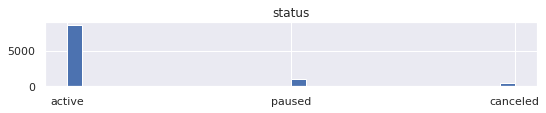

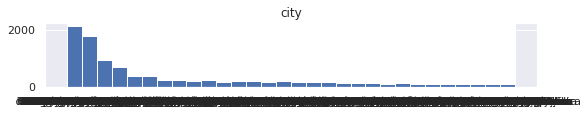

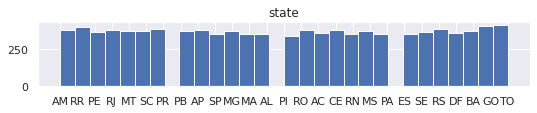

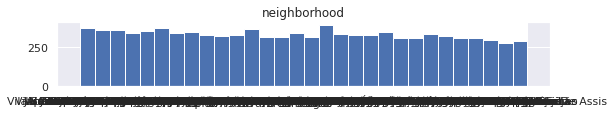

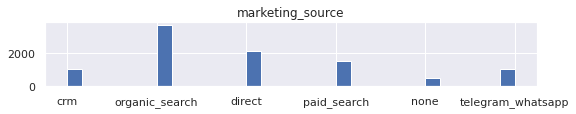

In [13]:
#Distribuição das variáveis categoricas 
colunas = categorical_features

def dist(df, colunas):
    
    for i in colunas:
        #fig, ax = plt.subplots(1, 4,figsize=(15,5))
        plt.figure(figsize=(30, 4))
        plt.subplot(3, 3, 1)
        plt.hist(data=df, x=i, bins=30)
        plt.title(i)
        plt.show()
        plt.plot   
        
dist(df, colunas)

## Análise das features status e marketing_source

    * contagem das features
    * cruzamento de dados
    * valor de churn por canal de conversão

# EDA - Features categoricas 

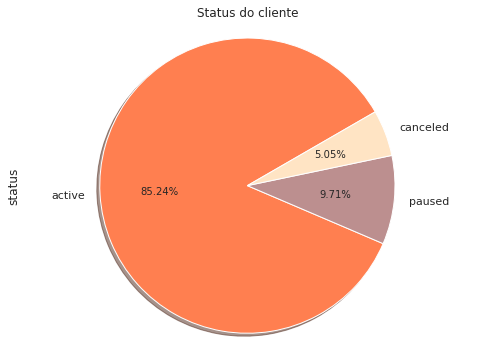

In [14]:
#Análise da feature - Status

colors = [ 'coral','rosybrown', 'bisque']
plt.figure(figsize=(8,6))
df['status'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%', shadow=True, colors=colors, startangle=30)
plt.title("Status do cliente")
plt.axis('equal')
plt.show()

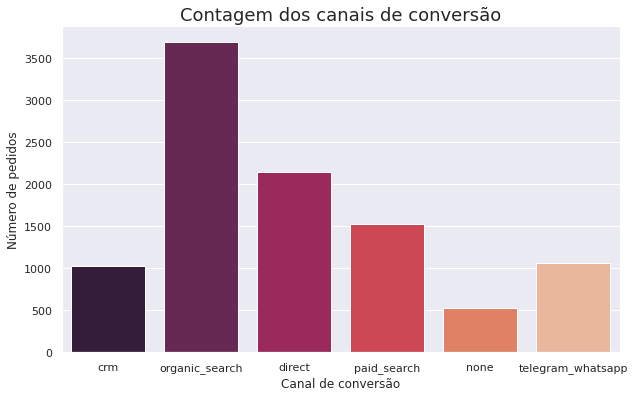

In [15]:
#Análise da feature - Canal de conversão
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='marketing_source', palette='rocket')
plt.ylabel("Número de pedidos", size=12) 
plt.xlabel("Canal de conversão", size=12) 
plt.title('Contagem dos canais de conversão', size=18) 
plt.show()

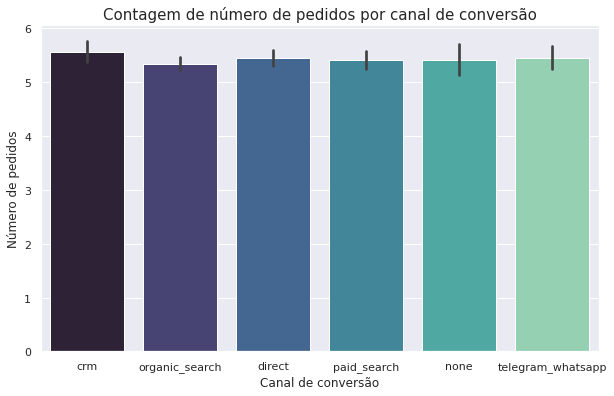

In [16]:
#Número de pedidos por canal de conversão

plt.figure(figsize=(10, 6)) 
sns.barplot(x="marketing_source", y='all_orders', data=df, palette='mako', ) 
  
plt.ylabel("Número de pedidos", size=12) 
plt.xlabel("Canal de conversão", size=12) 
plt.title("Contagem de número de pedidos por canal de conversão", size=15) 
plt.show()

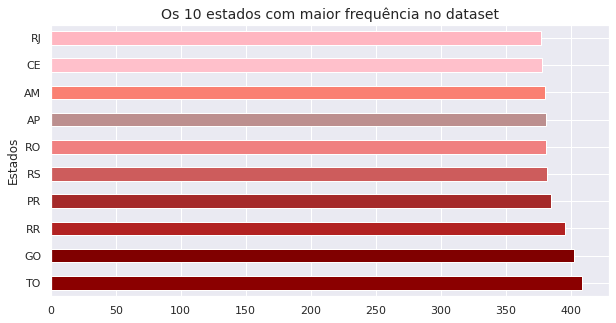

In [17]:
# Estados que tem maior frequência no dataset

colors = [ 'darkred','maroon', 'firebrick', 'brown', 
          'indianred', 'lightcoral', 'rosybrown', 
          'salmon', 'pink', 'lightpink']



plt.figure(figsize=(10,5))
df['state'].value_counts()[:10].plot(kind='barh', color=colors)
plt.ylabel("Estados", size=12) 
plt.title("Os 10 estados com maior frequência no dataset", size=14) 
plt.show()

## Análise de churn por canal de conversão

    - A premissa dessa análise é identificar se há diferença no número de cancelamento entre os canais

In [18]:
# Porcentagem de perda de cliente pela coluna status
#Calculo de churn 
negative = ((df.status == ('canceled')) + (df.status == ('paused'))).sum() #Somatória de assinaturas pausadas + canceladas
positive = (df.status == ('active')).sum() #Assinaturas ativas
churn = round((negative / positive)*100,2) #Divisão dos clientes que cancelaram pelos clientes ativos
print(f'Churn da feature status: {churn}%') 

Churn da feature status: 17.32%


In [19]:
#Quanto de cada canal de conversão ainda estão ativos, pausados ou cancelados

grouped = pd.DataFrame(df.groupby(['status', 'marketing_source'])['id'].aggregate('count'))
grouped[:10]

id
status   marketing_source       
active   crm                 874
         direct             1872
         none                439
         organic_search     3118
         paid_search        1307
         telegram_whatsapp   914
canceled crm                  43
         direct               96
         none                 34
         organic_search      196

In [20]:
#Criando um novo dataframe com as informações 

data = {
    'status' : ['ativos', 'cancelaram', 'pausaram', 'total'],
    'CRM' : [874, 43, 112, 1029],
    'telegram' : [914, 66, 88, 1068],
    'pesquisa_paga': [1307, 70, 149, 1526],
    'venda_direta' : [1872, 96, 181, 2149],
    'pesquisa_organica' : [3118, 196, 385,3699],
    
}



#Transformando o dicionário em formato de dataframe
data = pd.DataFrame(data)
data

,status,CRM,telegram,pesquisa_paga,venda_direta,pesquisa_organica
0,ativos,874,914,1307,1872,3118
1,cancelaram,43,66,70,96,196
2,pausaram,112,88,149,181,385
3,total,1029,1068,1526,2149,3699


In [21]:
#Nesta célula contém o código para o cálculo de churn das colunas CRM, Telegram/Whatsapp, Pesquisa Paga, Venda Direta e Pesquisa Orgânica
churn_crm = ((data.iloc[1,1] + data.iloc[2,1]) / data.iloc[3,1])*100
churn_telegram = ((data.iloc[1,2] + data.iloc[2,2]) / data.iloc[3,2])*100
churn_PesquisaPaga = ((data.iloc[1,3] + data.iloc[2,3]) / data.iloc[3,3])*100
churn_VendaDireta = ((data.iloc[1,4] + data.iloc[2,4]) / data.iloc[3,4])*100
churn_PesquisaOrganica = ((data.iloc[1,5] + data.iloc[2,5]) / data.iloc[3,5])*100

In [22]:
#Nesta célula irei apresentar a resposta dos respectivos churns
print(f"O churn do canal de conversão CRM é {churn_crm:.2f}%")
print(f"O churn do canal de conversão do telegram/whatsapp é {churn_telegram:.2f}% ")
print(f"O churn do canal de conversão Pesuisa Paga é {churn_PesquisaPaga:.2f}%  ")
print(f"O churn do canal de conversão Venda Direta é {churn_VendaDireta:.2f}%  ")
print(f"O churn do canal de conversão Pesquisa Orgânica é {churn_PesquisaOrganica:.2f}%  ")

O churn do canal de conversão CRM é 15.06%
O churn do canal de conversão do telegram/whatsapp é 14.42% 
O churn do canal de conversão Pesuisa Paga é 14.35%  
O churn do canal de conversão Venda Direta é 12.89%  
O churn do canal de conversão Pesquisa Orgânica é 15.71%  


# EDA - Features numéricas

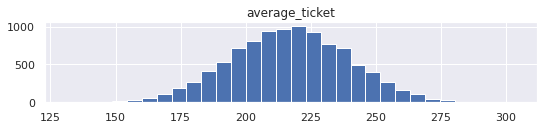

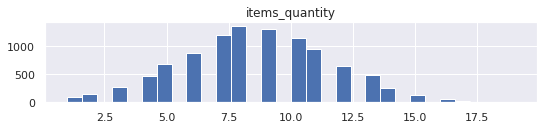

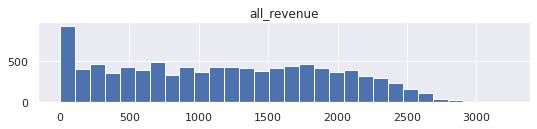

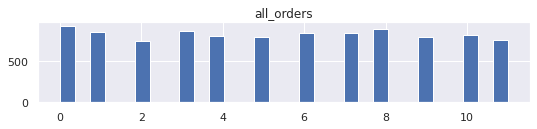

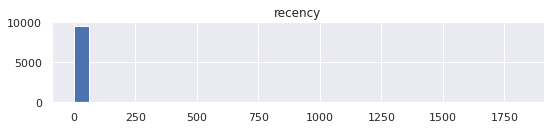

In [23]:
colunas = numeric_features

def dist(df, colunas):
    
    for i in colunas:
        #fig, ax = plt.subplots(1, 4,figsize=(15,5))
        plt.figure(figsize=(30, 5))
        plt.subplot(3, 3, 1)
        plt.hist(data=df, x=i, bins=30)
        plt.title(i)
        plt.show()
        plt.plot   
        
dist(df, colunas)

# Tratamento - Time Series


In [24]:
# visão geral
time_features.head()

,created_at,updated_at,last_date_purchase
0,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,2021-01-14 11:23:50.659119
1,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,2021-01-08 11:23:50.660183
2,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,2021-01-07 11:23:50.660990
3,2018-07-21 10:17:57.000000,2021-01-10 11:23:50.661827,2021-01-10 11:23:50.661827
4,2018-06-08 12:09:50.000000,2021-01-18 11:23:50.662621,2021-01-18 11:23:50.662621


In [25]:
## Conversão das colunas para o objeto datetime do pandas para conseguir fazer as manipulações nas colunas
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', format='%Y-%m-%d')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce', format='%Y-%m-%d')
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'], errors='coerce', format='%Y-%m-%d')

In [26]:
#Verificando se o objeto foi convertido
df.dtypes

id                            object
created_at            datetime64[ns]
updated_at            datetime64[ns]
status                        object
city                          object
state                         object
neighborhood                  object
last_date_purchase    datetime64[ns]
average_ticket               float64
items_quantity                 int64
all_revenue                  float64
all_orders                     int64
recency                        int64
marketing_source              object
dtype: object

In [27]:
#Modificando todas as colunas temporais para retorna só o ano 
df['created_at'] = df.created_at.dt.year
df['updated_at'] = df.updated_at.dt.year
df['last_date_purchase'] = df.last_date_purchase.dt.year

In [28]:
#Dropando a feature id, pois não irei usar nas análises
del df['id']

df.head(3)

,created_at,updated_at,status,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,2017,2021,active,Peixoto da Praia,AM,Aparecida 7ª Seção,2021,151.142942,10,906.857651,6,35,crm
1,2019,2021,paused,Fernandes,RR,Santa Isabel,2021,236.991790,4,236.991790,1,41,organic_search
2,2019,2021,active,Lopes,RR,Estrela,2021,211.955597,13,2331.511572,11,42,organic_search


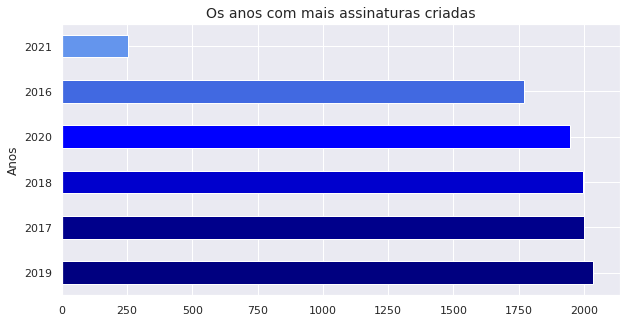

In [29]:
#Análise dos anos com mais assinaturas criadas
colors = ['navy', 'darkblue', 'mediumblue', 'blue', 'royalblue', 'cornflowerblue']

plt.figure(figsize=(10,5))
df['created_at'].value_counts().plot(kind='barh',color= colors)
plt.ylabel("Anos", size=12) 
plt.title("Os anos com mais assinaturas criadas", size=14) 
plt.show()

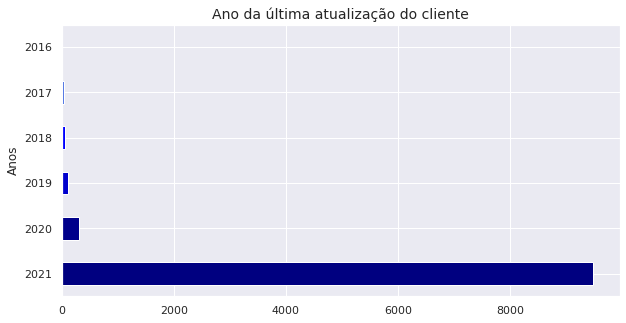

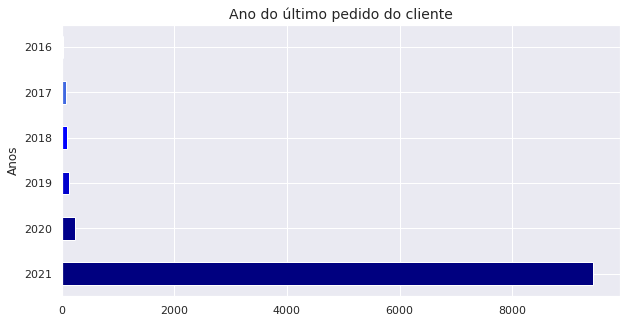

In [30]:
#Análise dos anos da última atualização na plataforma
colors = ['navy', 'darkblue', 'mediumblue', 'blue', 'royalblue', 'cornflowerblue']

plt.figure(figsize=(10,5))
df['updated_at'].value_counts().plot(kind='barh', color = colors)
plt.ylabel("Anos", size=12) 
plt.title("Ano da última atualização do cliente", size=14) 
plt.show()

#Último pedido feito na plataforma
plt.figure(figsize=(10,5))
df['last_date_purchase'].value_counts().plot(kind='barh', color = colors)
plt.ylabel("Anos", size=12) 
plt.title("Ano do último pedido do cliente", size=14) 
plt.show()

## Correlação entre as variáveis

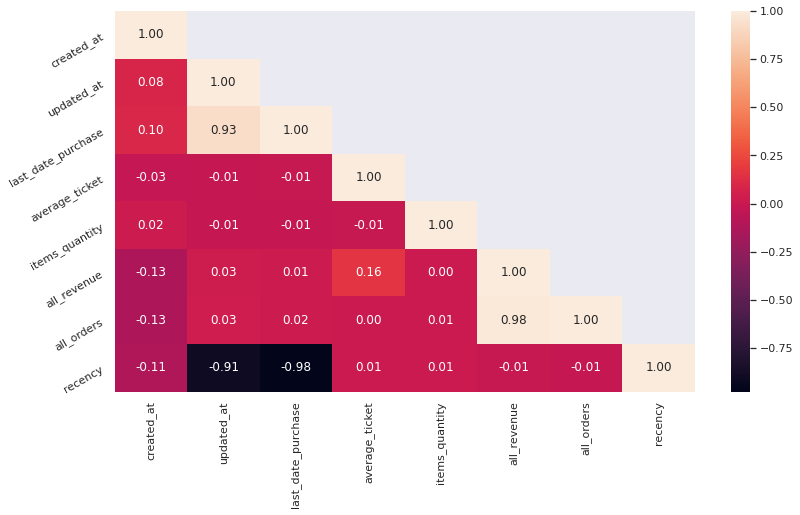

In [31]:
#verificando a correlação das variáveis
corr = df.corr() 
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') 
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Tratamento e Treinamento das features

<AxesSubplot:>

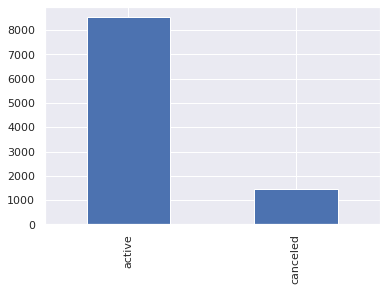

In [32]:
# Balancemento da coluna status

df['status'] = df['status'].replace('paused', 'canceled')
df.status.value_counts().plot(kind='bar')

In [33]:
df.head()

,created_at,updated_at,status,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,2017,2021,active,Peixoto da Praia,AM,Aparecida 7ª Seção,2021,151.142942,10,906.857651,6,35,crm
1,2019,2021,canceled,Fernandes,RR,Santa Isabel,2021,236.991790,4,236.991790,1,41,organic_search
2,2019,2021,active,Lopes,RR,Estrela,2021,211.955597,13,2331.511572,11,42,organic_search
3,2018,2021,active,Campos do Campo,PE,Confisco,2021,204.113227,8,1224.679359,6,39,organic_search
4,2018,2021,active,das Neves,RJ,Vila Suzana Segunda Seção,2021,252.940997,9,2023.527980,8,31,crm


## Fit do modelo

In [34]:
X = df.drop(['status'], axis=1)
y= df['status']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [36]:
X_train.head()

,created_at,updated_at,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
9069,2019,2021,Lopes,PE,Vila Ecológica,2021,239.452972,11,957.811890,4,36,crm
2603,2018,2021,Cavalcanti dos Dourados,AM,Lourdes,2021,214.999156,12,0.000000,0,26,crm
7738,2019,2021,da Paz,MG,Lindéia,2021,214.635021,2,0.000000,0,35,paid_search
1579,2017,2021,Oliveira do Sul,SP,Jaraguá,2021,235.938146,13,1651.567019,7,32,organic_search
5058,2017,2021,Alves de Minas,MS,Conjunto Floramar,2021,223.196460,13,669.589381,3,33,organic_search


In [37]:
# Import das bibliotecas que serão usadas no Pipeline e treinamento do modelo

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [38]:
#Montando o pipeline

pipe = Pipeline(
    [
        ('encoder', OneHotEncoder(variables=['marketing_source', 'city', 'neighborhood', 'state'])),
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier()),
]
)

In [39]:
#Treinamento do modelo

pipe.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 OneHotEncoder(variables=['marketing_source', 'city',
                                          'neighborhood', 'state'])),
                ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [40]:
y_pred = pipe.predict(X_test)
y_pred

array(['active', 'active', 'active', ..., 'canceled', 'active', 'active'],
      dtype=object)

In [41]:
#importando a função para mostrar a matriz confusão
from sklearn import metrics

#Instanciando a matriz confusão
cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2549,    3],
       [ 298,  150]])

In [42]:
#Verificando acurácia do modelo

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc_acc = accuracy_score(y_test, pipe.predict(X_test))
print(f"Acurácia dos dados de treino: {accuracy_score(y_train, pipe.predict(X_train))}")
print(f"Acurácia nos dados de teste {round(rfc_acc, 3)}\n")

Acurácia dos dados de treino: 1.0
Acurácia nos dados de teste 0.9



In [46]:
# Teste do modelo

result = pd.DataFrame({"pred": y_pred, "actual": y_test})
result.head()

,pred,actual
6252,active,active
4684,active,active
1731,active,active
4742,active,active
4521,active,canceled
